### 합성곱층 구현 및 간단한 표현

In [208]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
%matplotlib inline

In [209]:
# 아주 간단한 합성곱 층 구현
class Conv:
    # 간단한 예이므로, W는 3x3으로 고정, stride, padding 고려 X
    def __init__(self, W):
        self.W = W
    
    def f_prop(self, X):
        out = np.zeros((X.shape[0]-2, X.shape[1]-2))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                x = X[i:i+3, j:j+3]
                # 각 요소별 곱의 합계 취하는 중
                out[i, j] = np.dot(self.W.flatten(), x.flatten())
        return out

In [210]:
local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy')
X = np.load(local_filename)
X.shape

(10, 10)

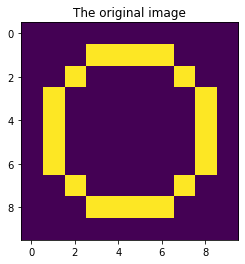

In [211]:
plt.imshow(X)
plt.title("The original image", fontsize=12)
plt.show()

In [212]:
W1 = np.array([[0,1,0],
             [0,1,0],
             [0,1,0]])
W2 = np.array([[0,0,0],
             [1,1,1],
             [0,0,0]])
W3 = np.array([[1,0,0],
             [0,1,0],
             [0,0,1]])
W4 = np.array([[0,0,1],
             [0,1,0],
             [1,0,0]])

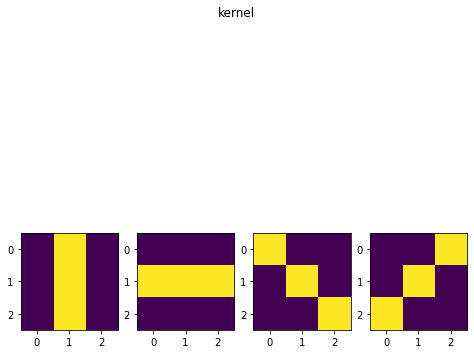

In [213]:
plt.figure(figsize=(8,8))
plt.subplot(1, 4, 1) ; plt.imshow(W1)
plt.subplot(1, 4, 2) ; plt.imshow(W2)
plt.subplot(1, 4, 3) ; plt.imshow(W3)
plt.subplot(1, 4, 4) ; plt.imshow(W4)
plt.suptitle("kernel", fontsize=12)
plt.show()

In [214]:
# 합성곱
conv1 = Conv(W1); C1 = conv1.f_prop(X)
conv2 = Conv(W2); C2 = conv2.f_prop(X)
conv3 = Conv(W3); C3 = conv3.f_prop(X)
conv4 = Conv(W4); C4 = conv4.f_prop(X)

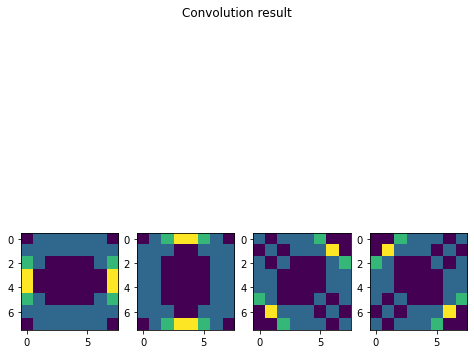

In [215]:
plt.figure(figsize=(8,8))
plt.subplot(1, 4, 1) ; plt.imshow(C1)
plt.subplot(1, 4, 2) ; plt.imshow(C2)
plt.subplot(1, 4, 3) ; plt.imshow(C3)
plt.subplot(1, 4, 4) ; plt.imshow(C4)
plt.suptitle("Convolution result", fontsize=12)
plt.show()

In [216]:
C1.shape

(8, 8)

### 강아지 이미지로 합성곱층 적용

In [4]:
from PIL import Image
import numpy as np

In [5]:
path = './dog.jpg'

image_pil = Image.open(path)
image = np.array(image_pil)

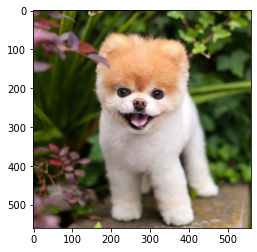

In [168]:
plt.imshow(image)

In [169]:
image.shape

(560, 560, 3)

In [170]:
image_pil = Image.open(path)
imgGray = image_pil.convert('L')

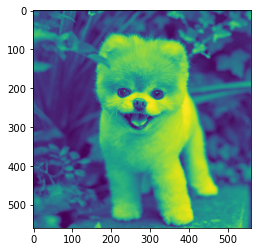

In [171]:
plt.imshow(imgGray)

In [172]:
image = np.array(imgGray)
image.shape

(560, 560)

In [173]:
# 합성곱
conv1 = Conv(W1); C1 = conv1.f_prop(image)
conv2 = Conv(W2); C2 = conv2.f_prop(image)
conv3 = Conv(W3); C3 = conv3.f_prop(image)
conv4 = Conv(W4); C4 = conv4.f_prop(image)

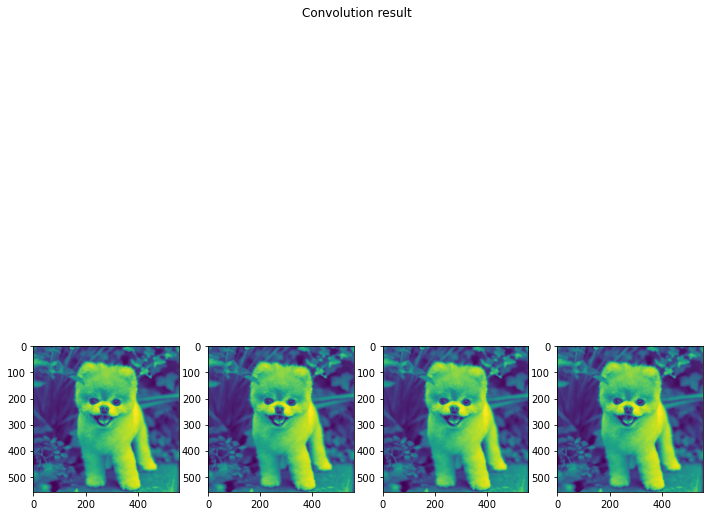

In [174]:
plt.figure(figsize=(12,12))
plt.subplot(1, 4, 1) ; plt.imshow(C1)
plt.subplot(1, 4, 2) ; plt.imshow(C2)
plt.subplot(1, 4, 3) ; plt.imshow(C3)
plt.subplot(1, 4, 4) ; plt.imshow(C4)
plt.suptitle("Convolution result", fontsize=12)
plt.show()

- 큰 변화를 주지 못했음
- 해상도가 너무 높아서

In [203]:
path = './dog.jpg'

image_pil = Image.open(path)
imgGray = image_pil.convert('L')
img_resize = imgGray.resize((32, 32))

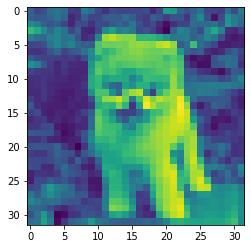

In [204]:
plt.imshow(img_resize)

In [205]:
image = np.array(img_resize)
image.shape

(32, 32)

In [206]:
# 합성곱
conv1 = Conv(W1); C1 = conv1.f_prop(image)
conv2 = Conv(W2); C2 = conv2.f_prop(image)
conv3 = Conv(W3); C3 = conv3.f_prop(image)
conv4 = Conv(W4); C4 = conv4.f_prop(image)

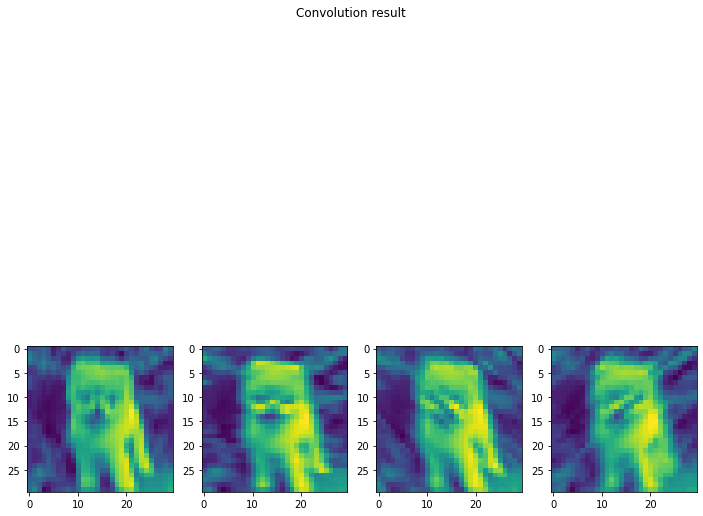

In [207]:
plt.figure(figsize=(12,12))
plt.subplot(1, 4, 1) ; plt.imshow(C1)
plt.subplot(1, 4, 2) ; plt.imshow(C2)
plt.subplot(1, 4, 3) ; plt.imshow(C3)
plt.subplot(1, 4, 4) ; plt.imshow(C4)
plt.suptitle("Convolution result", fontsize=12)
plt.show()

- 미세하지만 잘보면 커널 모양에 유사하게 합성곱층이 적용된 것을 볼 수 있음
- 추후 스트라이드, 패딩층을 적용하고 학습시키고 한다면 강아지의 특징을 추출해서 학습에 사용할 수 있을 것